# Electric Consumption and Cost

Data is retrieved from [NYC Open Data](https://data.cityofnewyork.us/Housing-Development/Electric-Consumption-And-Cost-2010-April-2020-/jr24-e7cr).

This project is divided into the following:
* Data Exploration
* Visualizations
* Missing Values & Data Cleaning
* Test and Training with SciKit
* Data Transformations

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

In [108]:
electric_consumption = pd.read_csv("/Users/sheryl/GitHub/data71200su21/Project 1/dataset/electric-consumption.csv", low_memory=False)

In [109]:
electric_consumption

,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,15396.82,GOV/NYC/068,Yes,128800,7387.97,216.00,2808.00,5200.85
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14556.34,GOV/NYC/068,Yes,115200,6607.87,224.00,2912.00,5036.47
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13904.98,GOV/NYC/068,Yes,103200,5919.55,216.00,2808.00,5177.43
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,14764.04,GOV/NYC/068,Yes,105600,6057.22,208.00,2704.00,6002.82
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,13729.54,GOV/NYC/068,Yes,97600,5598.34,216.00,2808.00,5323.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301312,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 02,INTERVAL,NaN,163.0,272,K016300,FEDERAL,...,1096666,N,1287.71,GOV/NYC/068,Yes,0,0.00,116.16,1160.44,127.27
301313,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 03,INTERVAL,NaN,163.0,272,K016300,FEDERAL,...,1096667,N,1705.42,GOV/NYC/068,Yes,0,0.00,153.84,1536.86,168.56
301314,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 03,AMR,NaN,163.0,272,K016300,FEDERAL,...,8096664,N,3782.25,GOV/NYC/068,Yes,101200,3408.42,0.00,0.00,373.83
301315,WYCKOFF GARDENS,BROOKLYN,WYCKOFF GARDENS,BLD 02,AMR,NaN,163.0,272,K016300,FEDERAL,...,8096666,N,2541.43,GOV/NYC/068,Yes,68000,2290.24,0.00,0.00,251.19


In [111]:
electric_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301317 entries, 0 to 301316
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    301193 non-null  object 
 1   Borough             301317 non-null  object 
 2   Account Name        301317 non-null  object 
 3   Location            293386 non-null  object 
 4   Meter AMR           301231 non-null  object 
 5   Meter Scope         15799 non-null   object 
 6   TDS #               299936 non-null  float64
 7   EDP                 301317 non-null  int64  
 8   RC Code             301317 non-null  object 
 9   Funding Source      301317 non-null  object 
 10  AMP #               299972 non-null  object 
 11  Vendor Name         301317 non-null  object 
 12  UMIS BILL ID        301317 non-null  int64  
 13  Revenue Month       301317 non-null  object 
 14  Service Start Date  301314 non-null  object 
 15  Service End Date    301314 non-nul

In [112]:
electric_consumption.Borough.unique()

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND',
       'NON DEVELOPMENT FACILITY', 'FHA'], dtype=object)

In [113]:
electric_consumption.describe()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
count,299936.000000,301317.000000,3.013170e+05,301314.000000,301317.000000,3.013170e+05,301317.000000,301317.000000,301317.000000,301317.000000
mean,118.513576,424.835111,4.471668e+06,30.365592,4359.692793,3.243415e+04,1586.340925,65.953820,1035.045797,1738.306071
std,128.908939,185.714308,1.963247e+06,1.664890,6237.267626,5.053216e+04,2649.869237,645.758963,1734.666074,3626.491037
min,1.000000,63.000000,1.726303e+06,1.000000,-1207.550000,0.000000e+00,0.000000,0.000000,0.000000,-59396.430000
25%,33.000000,227.000000,2.843192e+06,29.000000,446.130000,0.000000e+00,0.000000,0.000000,0.000000,30.380000
50%,64.000000,426.000000,4.100110e+06,30.000000,2573.780000,1.604000e+04,730.020000,27.220000,381.720000,1037.400000
75%,162.000000,552.000000,5.736544e+06,32.000000,5844.540000,4.784000e+04,2263.150000,94.400000,1528.060000,2780.500000
max,582.000000,999.000000,8.893530e+06,257.000000,329800.370000,1.779600e+06,195575.860000,329074.000000,78782.960000,134224.510000


In [114]:
electric_consumption.hist

<bound method hist_frame of        Development Name   Borough     Account Name Location Meter AMR  \
0                 ADAMS     BRONX            ADAMS   BLD 05      NONE   
1                 ADAMS     BRONX            ADAMS   BLD 05      NONE   
2                 ADAMS     BRONX            ADAMS   BLD 05      NONE   
3                 ADAMS     BRONX            ADAMS   BLD 05      NONE   
4                 ADAMS     BRONX            ADAMS   BLD 05      NONE   
...                 ...       ...              ...      ...       ...   
301312  WYCKOFF GARDENS  BROOKLYN  WYCKOFF GARDENS   BLD 02  INTERVAL   
301313  WYCKOFF GARDENS  BROOKLYN  WYCKOFF GARDENS   BLD 03  INTERVAL   
301314  WYCKOFF GARDENS  BROOKLYN  WYCKOFF GARDENS   BLD 03       AMR   
301315  WYCKOFF GARDENS  BROOKLYN  WYCKOFF GARDENS   BLD 02       AMR   
301316  WYCKOFF GARDENS  BROOKLYN  WYCKOFF GARDENS   BLD 03       AMR   

         Meter Scope  TDS #  EDP  RC Code Funding Source  ... Meter Number  \
0       BLD 01 to

# Visualizations

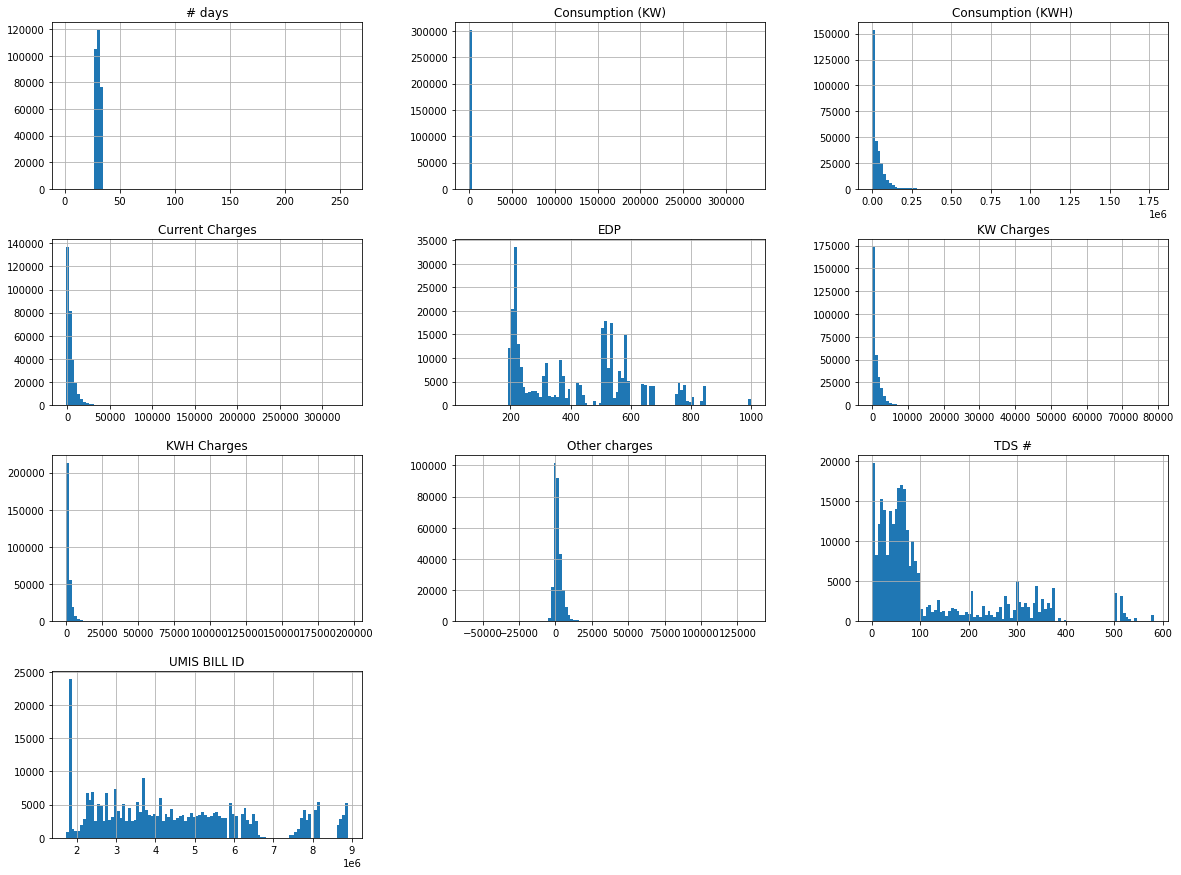

In [115]:
%matplotlib inline 
electric_consumption.hist(bins=100, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f819afe8d90>,
      dtype=object)

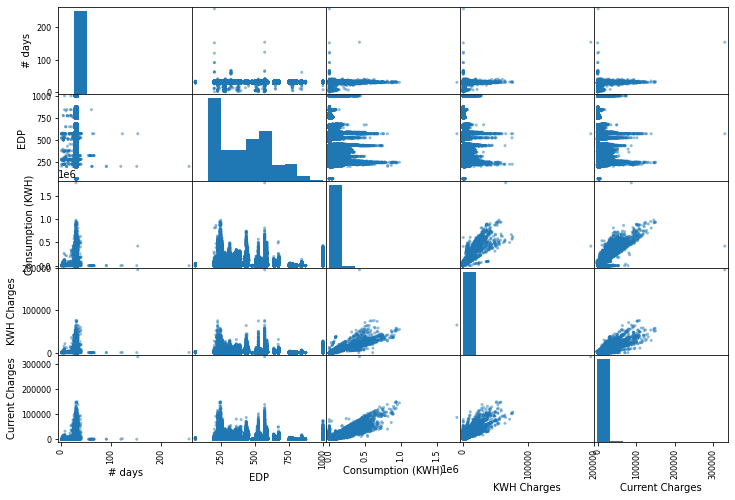

In [116]:
attributes = ["# days", "EDP", "Consumption (KWH)", "KWH Charges", "Current Charges"]
scatter_matrix(electric_consumption[attributes], figsize=(12, 8))

In [117]:
electric_consumption.corr()

,TDS #,EDP,UMIS BILL ID,# days,Current Charges,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
TDS #,1.000000,0.342350,-0.047025,-0.003635,-0.060324,-0.062816,-0.056086,-0.008567,-0.061626,-0.033363
EDP,0.342350,1.000000,-0.006871,-0.000422,-0.118232,-0.110852,-0.097717,-0.020998,-0.121361,-0.073897
UMIS BILL ID,-0.047025,-0.006871,1.000000,-0.047480,-0.127341,-0.074610,-0.154094,-0.006934,-0.121866,-0.048128
# days,-0.003635,-0.000422,-0.047480,1.000000,0.026932,0.023735,0.043611,-0.000541,0.007510,0.010862
Current Charges,-0.060324,-0.118232,-0.127341,0.026932,1.000000,0.906807,0.900370,0.068887,0.332156,0.903139
Consumption (KWH),-0.062816,-0.110852,-0.074610,0.023735,0.906807,1.000000,0.952623,0.024559,0.113613,0.809209
KWH Charges,-0.056086,-0.097717,-0.154094,0.043611,0.900370,0.952623,1.000000,0.027505,0.126959,0.757137
Consumption (KW),-0.008567,-0.020998,-0.006934,-0.000541,0.068887,0.024559,0.027505,1.000000,0.164365,0.019761
KW Charges,-0.061626,-0.121361,-0.121866,0.007510,0.332156,0.113613,0.126959,0.164365,1.000000,0.000181
Other charges,-0.033363,-0.073897,-0.048128,0.010862,0.903139,0.809209,0.757137,0.019761,0.000181,1.000000


# Missing Value and Data Cleaning

In [118]:
electric_consumption['Consumption (KWH)'].isnull().values.any()

False

In [129]:
electric_consumption['Consumption (KWH)'] = electric_consumption['Consumption (KWH)'].fillna(electric_consumption['Consumption (KWH)'].mean())

In [119]:
electric_consumption['TDS #'].isnull().values.any()

True

In [128]:
electric_consumption['TDS #'] = electric_consumption['TDS #'].fillna(electric_consumption['TDS #'].median())

In [120]:
electric_consumption['EDP'].isnull().values.any()

False

In [127]:
electric_consumption['EDP'] = electric_consumption['EDP'].fillna(electric_consumption['EDP'].mean())

In [121]:
electric_consumption['# days'].isnull().values.any()

True

In [126]:
electric_consumption['# days'] = electric_consumption['# days'].fillna(electric_consumption['# days'].mean())

In [122]:
electric_consumption['Current Charges'].isnull().values.any()

False

In [125]:
electric_consumption['Current Charges'] = electric_consumption['Current Charges'].fillna(electric_consumption['Current Charges'].mean())

In [123]:
electric_consumption['KWH Charges'].isnull().values.any()

False

In [124]:
electric_consumption['KWH Charges'] = electric_consumption['KWH Charges'].fillna(electric_consumption['KWH Charges'].mean())

# Training and Test Set

In [130]:
X = electric_consumption.drop(["UMIS BILL ID", "Consumption (KWH)","Consumption (KW)", "KW Charges", "Other charges", 
                               "Bill Analyzed", "Meter Number", "AMP #", "Account Name", "Service Start Date",
                              "Service End Date", "RC Code", "Development Name", "Location", "Meter AMR", "Meter Scope",
                              "Vendor Name", "Funding Source", "Rate Class", "Revenue Month", "Borough", "Estimated"],axis=1)
print(X)

        TDS #  EDP  # days  Current Charges  KWH Charges
0       118.0  248    33.0         15396.82      7387.97
1       118.0  248    30.0         14556.34      6607.87
2       118.0  248    29.0         13904.98      5919.55
3       118.0  248    31.0         14764.04      6057.22
4       118.0  248    28.0         13729.54      5598.34
...       ...  ...     ...              ...          ...
301312  163.0  272    29.0          1287.71         0.00
301313  163.0  272    29.0          1705.42         0.00
301314  163.0  272    29.0          3782.25      3408.42
301315  163.0  272    29.0          2541.43      2290.24
301316  163.0  272    29.0          2967.49      2674.19

[301317 rows x 5 columns]


In [131]:
y = electric_consumption['Consumption (KWH)']
print(y)

0         128800
1         115200
2         103200
3         105600
4          97600
           ...  
301312         0
301313         0
301314    101200
301315     68000
301316     79400
Name: Consumption (KWH), Length: 301317, dtype: int64


In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [133]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

In [134]:
print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))

Test set score: 0.93


# Data Transformations

In [135]:
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log)
electric_consumption[["# days"]] = transformer.fit_transform(electric_consumption[["# days"]])
print(electric_consumption[["# days"]])

          # days
0       3.496508
1       3.401197
2       3.367296
3       3.433987
4       3.332205
...          ...
301312  3.367296
301313  3.367296
301314  3.367296
301315  3.367296
301316  3.367296

[301317 rows x 1 columns]


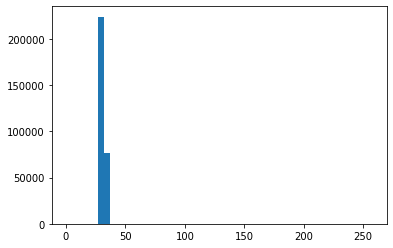

In [139]:
plt.hist(np.exp(electric_consumption['# days'].values.reshape(-1, 1)), bins=50)
plt.show()

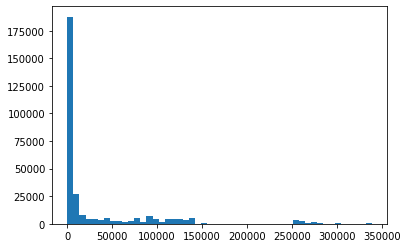

In [141]:
plt.hist(electric_consumption['TDS #'].values.reshape(-1, 1)**2, bins=50)
plt.show()

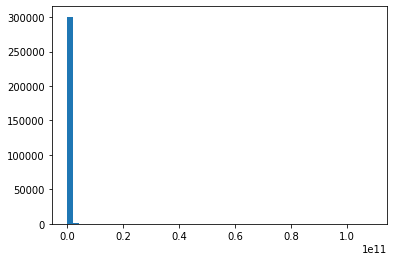

In [142]:
plt.hist(electric_consumption['Current Charges'].values.reshape(-1, 1)**2, bins=50)
plt.show()

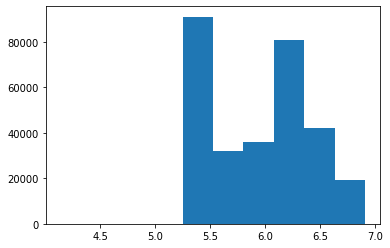

In [149]:
plt.hist(np.log(electric_consumption['EDP'].values.reshape(-1, 1)), bins=10)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f819af6f510>,
      dtype=object)

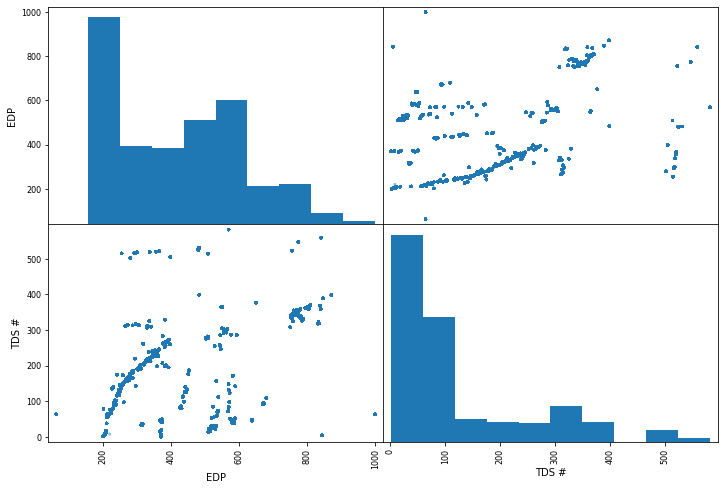

In [150]:
group = ["EDP", "TDS #"]
scatter_matrix(electric_consumption[group], figsize=(12, 8))